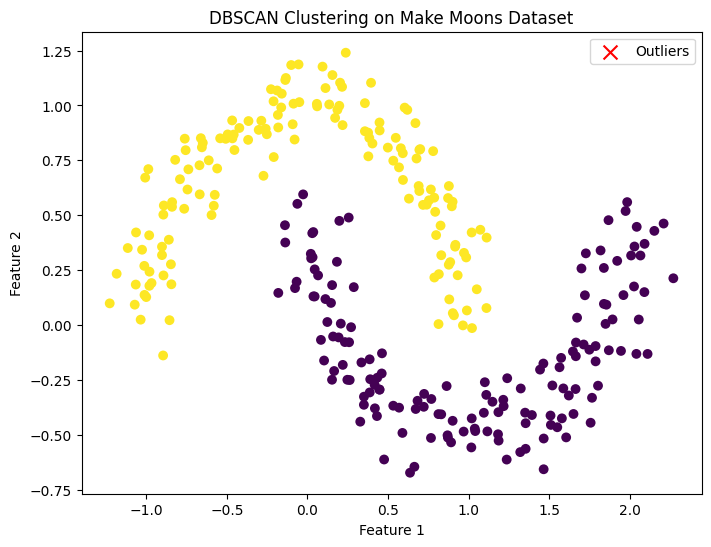

In [36]:
# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 1. 초승달 데이터셋 생성 (300개 샘플, 노이즈 0.1)
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# 2. DBSCAN 모델 학습
dbscan = DBSCAN(eps=0.2, min_samples=5)  # eps와 min_samples는 실험적으로 조정할 수 있습니다.
y_dbscan = dbscan.fit_predict(X)

# 3. 이상치 탐지 (DBSCAN에서 -1로 레이블링된 데이터는 이상치)
# -1은 이상치를 의미합니다.

# 4. 결과 시각화 (테두리 제거)
plt.figure(figsize=(8, 6))

# 클러스터와 이상치를 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', marker='o', s=50, edgecolors='none')  # 테두리 제거
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], color='red', label='Outliers', s=100, marker='x')

# 제목과 라벨 추가
plt.title('DBSCAN Clustering on Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [40]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. 와인 품질 데이터셋 로드
wine = load_wine()
X = wine.data  # 특성 (features)
y = wine.target  # 타겟 (목표 변수, 품질 등)

# 2. 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. DBSCAN 모델 학습
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps와 min_samples는 실험적으로 조정할 수 있습니다.
y_dbscan = dbscan.fit_predict(X_scaled)

# 4. 클러스터 개수와 이상치 개수
outliers = np.sum(y_dbscan == -1)  # 이상치 개수
clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)  # -1을 제외한 클러스터 개수

# 5. 클러스터별 샘플 수 계산
cluster_sizes = pd.Series(y_dbscan).value_counts()  # 각 클러스터에 속하는 샘플 수 계산
cluster_sizes = cluster_sizes[cluster_sizes != -1]  # 이상치는 제외

# 결과 출력
print(f'클러스터 개수: {clusters}')
print(f'이상치 개수: {outliers}')
print(f'클러스터별 샘플 수:\n{cluster_sizes}')


클러스터 개수: 0
이상치 개수: 178
클러스터별 샘플 수:
-1    178
Name: count, dtype: int64
